This notebook includes gene coexpression analysis. 

In [19]:
import scanpy as sc
from spatial_funcs import cluster_ordered_matrix
from sklearn.preprocessing import Normalizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import plotly.express as px

# Inputs

In [18]:
rpath = 'Z:/Connie/RIBOmap/result/FUCCI data'
adata = sc.read_h5ad(rpath+'/adata/FUCCI_cc_02-22-22.h5ad')
sample_list = ['RIBOmap', 'STARmap']
genes = adata.var.index
genes_coding_flt = genes[np.logical_and(adata.var['coding'], adata.var['filter'])]

In [14]:
# filtered expression matrix
X_filtered_coding = dict()
for s in sample_list:
    X_s = adata.X[np.logical_and(adata.obs['sample']==s, adata.obs['pass_all_filters'])] 
    X_s = X_s[:, np.logical_and(adata.var['filter'], adata.var['coding'])]
    X_filtered_coding[s] = X_s

In [16]:
# color bar based on expression level
expr_col_coding = dict()
greys = plt.get_cmap('Greys')
for s in sample_list:
    X_s = X_filtered_coding[s]
    mean_expr = np.mean(X_s, axis=0)
    mean_expr_norm = zscore(mean_expr) + 0.5
    cmap = greys(mean_expr_norm)
    expr_col_coding[s] = cmap

# co-expression

C:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\wangk\.conda\envs\connie\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


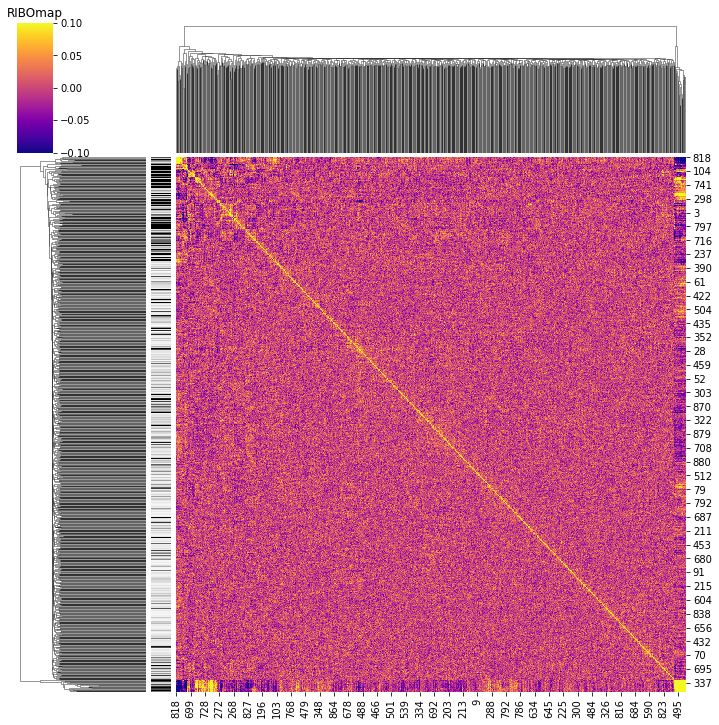

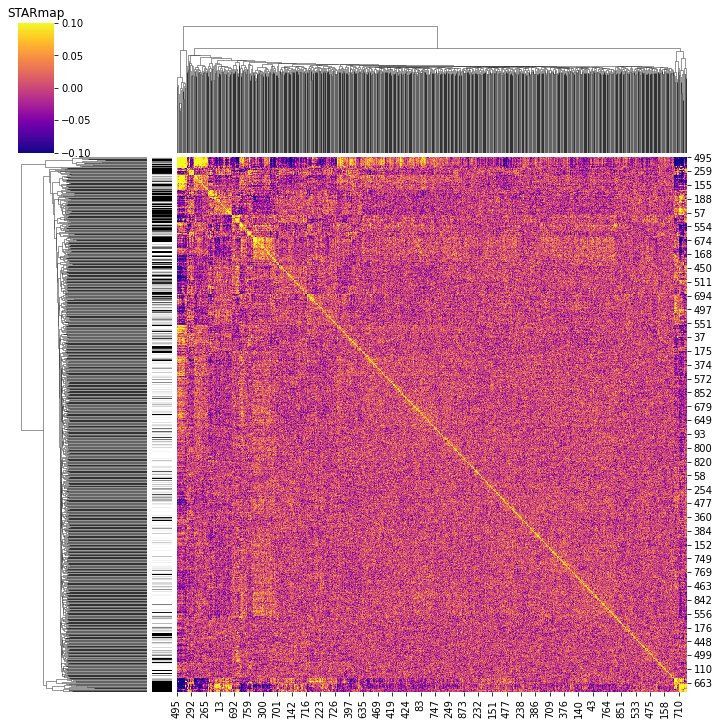

In [17]:
cov_ = dict()
for s in sample_list:
    X_norm = Normalizer(norm='l1').fit_transform(X_filtered_coding[s]) 
    cov = np.corrcoef(X_norm, rowvar=False)
    cov_[s] = cov
    sns.clustermap(cov, vmin=-0.1, vmax=0.1, row_colors=expr_col_coding[s], cmap='plasma')
    plt.title(s)
    # plt.savefig(rpath+'/figures/co-expression/{}_self.pdf'.format(s))

# compare STARmap to RIBOmap

In [20]:
n_clusters = 10
ordered_matrix, ordered_label, fig_ribo = cluster_ordered_matrix(cov_['RIBOmap'], cov_['RIBOmap'], genes_coding_flt, n_clusters=n_clusters, plotly=True, title='RIBOmap', zmin=-0.1, zmax=0.1, cbar_name='pearson R', cmap=px.colors.sequential.Plasma)
ordered_matrix, ordered_label, fig_star = cluster_ordered_matrix(cov_['RIBOmap'], cov_['STARmap'], genes_coding_flt, n_clusters=n_clusters, plotly=True, title='STARmap', zmin=-0.1, zmax=0.1, cbar_name='pearson R', cmap=px.colors.sequential.Plasma)
# fig_ribo.write_html('ce_ribo_10_3-13.html')
# fig_star.write_html('ce_star_10_3-13.html')
# pd.DataFrame(ordered_label).to_csv('ce_lo_10_3-13.csv')

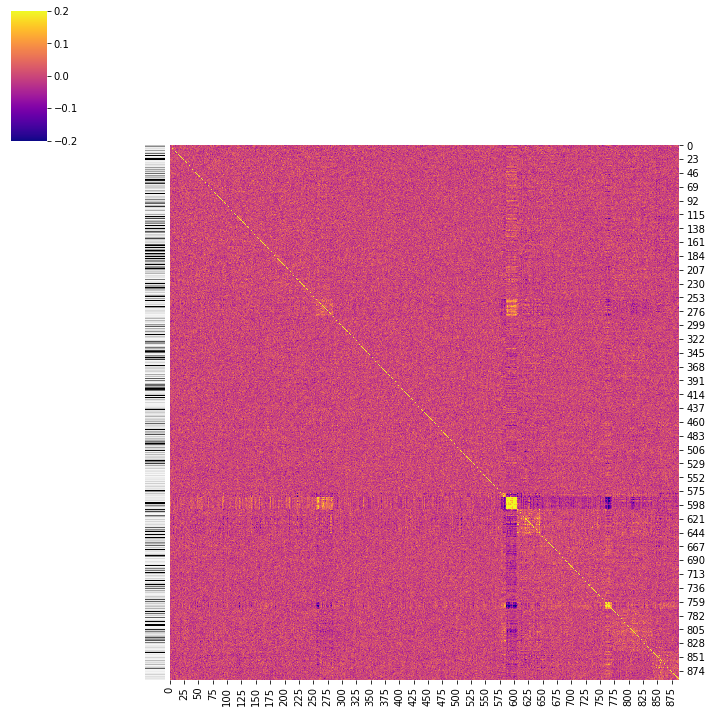

In [24]:
matrix_RR, ordered_label = cluster_ordered_matrix(cov_['RIBOmap'], cov_['RIBOmap'], genes_coding_flt, n_clusters=n_clusters, plotly=False)
fig = sns.clustermap(matrix_RR, row_cluster=False, col_cluster=False, row_colors=expr_col_coding['RIBOmap'], 
                vmin=-0.2, vmax=0.2, cmap='plasma')
fig.figure.savefig(rpath+'/figures/co-expression/ribomap.pdf')

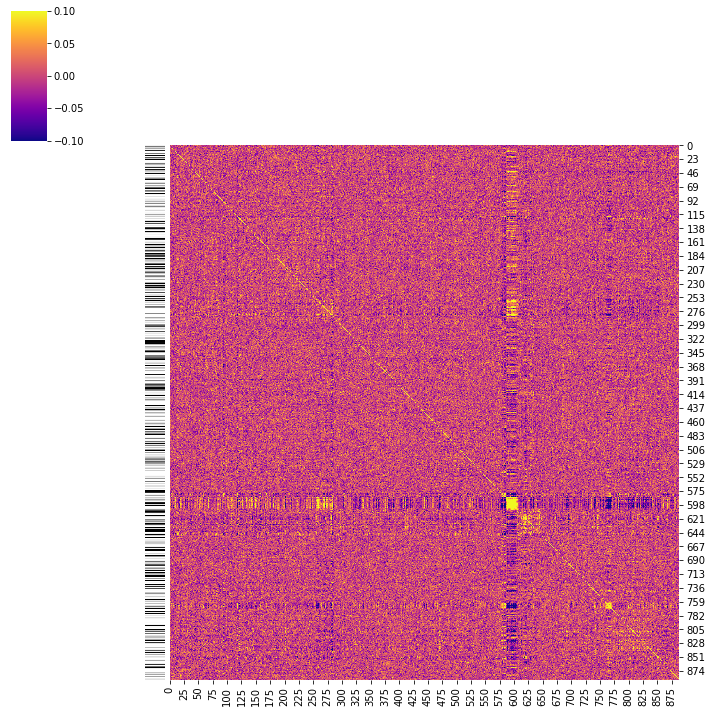

In [25]:
matrix_RS, ordered_label = cluster_ordered_matrix(cov_['RIBOmap'], cov_['STARmap'], genes_coding_flt, n_clusters=n_clusters, plotly=False)
fig = sns.clustermap(matrix_RS, row_cluster=False, col_cluster=False, row_colors=expr_col_coding['STARmap'], 
                vmin=-0.1, vmax=0.1, cmap='plasma')
fig.figure.savefig(rpath+'/figures/co-expression/starmap_asRIBO.pdf')